## Data from the web (server-side)
### 2024 Summer Olympics

In [13]:
import pandas as pd
url = "https://en.wikipedia.org/wiki/2024_Summer_Olympics"
tables = pd.read_html(url)
len(tables)  # 27 elements recognized as tables

27

In [14]:
type(tables)

list

In [15]:
"""
for i, table in enumerate(tables):
    print(f"Table {i}:")
    print(table.head(1), "\n")
"""

'\nfor i, table in enumerate(tables):\n    print(f"Table {i}:")\n    print(table.head(1), "\n")\n'

In [16]:
# Table on host city election
df1 = tables[2]
df1.head(3)

,City,Nation,Votes
0,Paris,France,Selected as 2024 host
1,Los Angeles,United States,Selected as 2028 host
2,Hamburg,Germany,Withdrew


In [17]:
# Table on number of atheletes by NOC
df2 = tables[9]
df2.head(3)

,Ranking,NOC,Athletes
0,1,United States,592
1,2,France,573
2,3,Australia,460


## Client side
### Covid-19 infections in Singapore

In [18]:
import requests
import matplotlib.pyplot as plt
base_url = "https://data.gov.sg/api/action/datastore_search"
url = base_url + "?resource_id=d_11e68bba3b3c76733475a72d09759eeb"
response = requests.get(url)
results = response.json()
df = pd.DataFrame(results["result"]["records"])
df.head()

,_id,epi_year,epi_week,est_count
0,1,2023,2023-09,4426
1,2,2023,2023-10,10352
2,3,2023,2023-11,10464
3,4,2023,2023-12,14467
4,5,2023,2023-13,28410


In [19]:
# Rename column names
df = df.drop(columns = ["_id"])
col_names = ["year", "epi_week", "count"]
df.columns = col_names
# Convert epi week into datetime
df["date"] = pd.to_datetime(df["epi_week"] + "-0", format = "%Y-%U-%w")
df["count"] = pd.to_numeric(df["count"])
df.head()

,year,epi_week,count,date
0,2023,2023-09,4426,2023-02-26
1,2023,2023-10,10352,2023-03-05
2,2023,2023-11,10464,2023-03-12
3,2023,2023-12,14467,2023-03-19
4,2023,2023-13,28410,2023-03-26


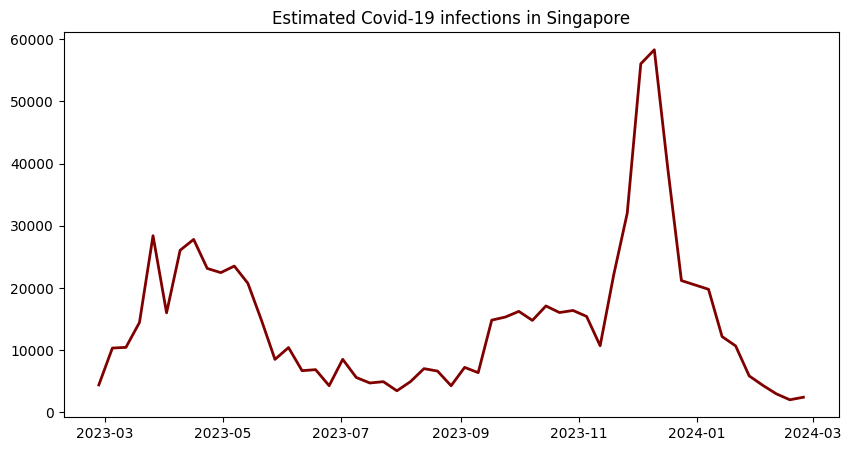

In [20]:
# Set figure size as needed
plt.figure(figsize = (10, 5))
# Plot
plt.plot(df["date"], df["count"], color = "maroon", linewidth = 2)
plt.title("Estimated Covid-19 infections in Singapore")
# Show the plot
plt.show()